# Segment Anything Video (SA-V) Dataset

This notebook presents an example showing how to load and visualize the SA-V annotations.
To run this notebook, you will need to have the following installed:
- jupyter
- matplotlib
- opencv-python
- numpy
- pycocoevalcap
- pandas

## Import libaries

In [1]:
import json

import pandas as pd
from utils.sav_utils import SAVDataset

## Example video and annotations from SA-V

In [ ]:
sav_dataset = SAVDataset(sav_dir="./sav_train/sav_000")
frames, manual_annot, auto_annot = sav_dataset.get_frames_and_annotations("sav_000001")

There are 483 frames decoded from ./sav_train/sav_000\sav_000001.mp4 (24fps).
Videos are annotated every 4 frames. To align with the annotations, downsample the video to 121 frames.


### Show the SA-V annotations in frame 0 - auto + manual

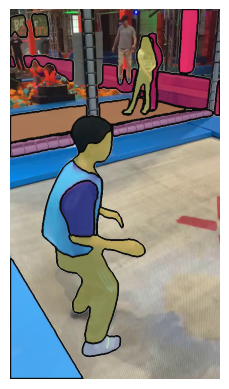

In [3]:
sav_dataset.visualize_annotation(
    frames, manual_annot, auto_annot, 
    annotated_frame_id=0,
)

### Show the SA-V annotations in another frame - auto + manual

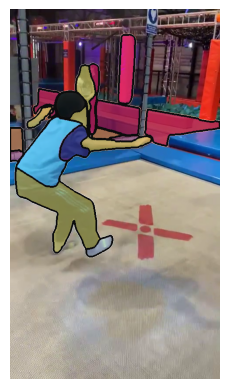

In [4]:
sav_dataset.visualize_annotation(
    frames, manual_annot, auto_annot, 
    annotated_frame_id=30,
)

### Show the SA-V annotations in frame 0 - manual only

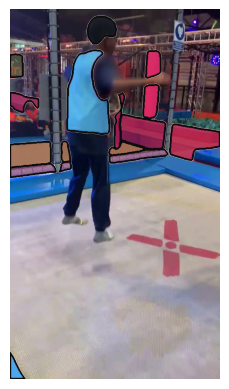

In [11]:
sav_dataset.visualize_annotation(
    frames, manual_annot, auto_annot,
    annotated_frame_id=50,
    show_auto=False,
)

### Show the SA-V annotations in frame 0 - auto only

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pycocotools.mask as mask_util
import cv2
manual_mask_colors = np.random.random((256, 3))
print(len(manual_annot["masklet"][0]))

5


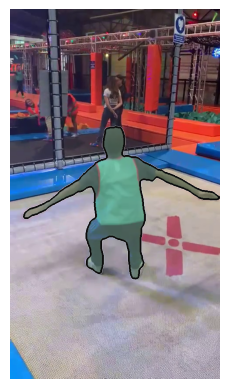

In [22]:
annotated_frame_id=67
rles = []
colors = []
rles.extend(manual_annot["masklet"][annotated_frame_id][1:2])
colors.extend(
    manual_mask_colors[: len(manual_annot["masklet"][annotated_frame_id])][1:2]
)

plt.imshow(frames[annotated_frame_id])

masks = [mask_util.decode(rle) > 0 for rle in rles]
borders = True
# sort masks by size
sorted_annot_and_color = sorted(
    zip(masks, colors), key=(lambda x: x[0].sum()), reverse=True
)
H, W = sorted_annot_and_color[0][0].shape[0], sorted_annot_and_color[0][0].shape[1]

canvas = np.ones((H, W, 4))
canvas[:, :, 3] = 0  # set the alpha channel
contour_thickness = max(1, int(min(5, 0.01 * min(H, W))))
for mask, color in sorted_annot_and_color:
    canvas[mask] = np.concatenate([color, [0.55]])
    if borders:
        contours, _ = cv2.findContours(
            np.array(mask, dtype=np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE
        )
        cv2.drawContours(
            canvas, contours, -1, (0.05, 0.05, 0.05, 1), thickness=contour_thickness
        )

ax = plt.gca()
ax.imshow(canvas)

plt.axis("off")
plt.show()

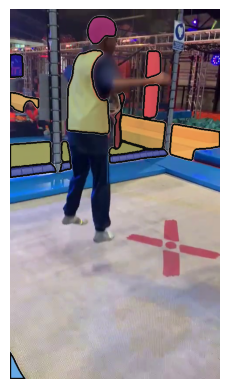

In [15]:
sav_dataset.visualize_annotation(
    frames, auto_annot, manual_annot,
    annotated_frame_id=50,
    show_manual=False,
)


### Masklet annotations and Metadata

#### Manual annotations and metadata

In [ ]:
pd.DataFrame([manual_annot])

,video_id,video_duration,video_frame_count,video_height,video_width,video_resolution,video_environment,video_split,masklet,masklet_id,masklet_size_rel,masklet_size_abs,masklet_size_bucket,masklet_visibility_changes,masklet_first_appeared_frame,masklet_frame_count,masklet_edited_frame_count,masklet_type,masklet_stability_score,masklet_num
0,sav_000001,20.125,483.0,848.0,480.0,407040.0,Indoor,train,"[[{'size': [848, 480], 'counts': 'i\Y4<Qj05K4L...","[0, 1, 2, 3, 4]","[0.0035249812, 0.0946159778, 0.011285757, 0.00...","[1434.8083333333, 38512.4876033058, 4593.75454...","[medium, large, medium, medium, medium]","[2, 0, 10, 0, 0]","[0.0, 0.0, 0.0, 113.0, 0.0]","[121, 121, 121, 121, 121]","[41, 11, 22, 4, 115]","[manual, manual, manual, manual, manual]","[None, None, None, None, None]",5


#### Auto annotations and metadata

In [ ]:
pd.DataFrame([auto_annot])

,video_id,video_duration,video_frame_count,video_height,video_width,video_resolution,video_environment,video_split,masklet,masklet_id,masklet_size_rel,masklet_size_abs,masklet_size_bucket,masklet_visibility_changes,masklet_first_appeared_frame,masklet_frame_count,masklet_edited_frame_count,masklet_type,masklet_stability_score,masklet_num
0,sav_000001,20.125,483.0,848.0,480.0,407040.0,Indoor,train,"[[{'size': [848, 480], 'counts': 'ka0e8ka001O1...","[0, 1, 2, 3, 4, 5, 6, 7, 8]","[0.010841089678796047, 0.038489445267425544, 0...","[4412.757142857143, 15666.743801652892, 7663.1...","[medium, large, medium, large, medium, medium,...","[5, 0, 0, 0, 0, 0, 10, 3, 12]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[121, 121, 121, 121, 121, 121, 121, 121, 121]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[auto, auto, auto, auto, auto, auto, auto, aut...","[[1.0, 0.999616265296936, 1.0, 1.0, 1.0, 1.0, ...",9


#### Video info

In [ ]:
video_id = manual_annot["video_id"]
video_duration = manual_annot["video_duration"]
video_frame_count = manual_annot["video_frame_count"]
H = manual_annot["video_height"]
W = manual_annot["video_width"]
environment = manual_annot["video_environment"]
print(
    f"{video_id} is {video_duration} seconds long with {video_frame_count} frames. The video resolution is {H} x {W}."
)
print(f"This video is captured in {environment} environment.")

sav_000001 is 20.125 seconds long with 483.0 frames. The video resolution is 848.0 x 480.0.
This video is captured in Indoor environment.


#### Masklet info

In [ ]:
print(
    f"There are {manual_annot['masklet_num']} manually labeled masklets and {auto_annot['masklet_num']} automatically generated masklets."
)
print(
    f"In SA-V, videos are annotated every 4 frames. Therefore, there are {manual_annot['masklet_frame_count'][0]} frames being annotated."
)

There are 5 manually labeled masklets and 9 automatically generated masklets.
In SA-V, videos are annotated every 4 frames. Therefore, there are 121 frames being annotated.


In [ ]:
# Get the rle of the manual masklet with masklet_id=0 in frame 0
masklet_id = 0
annotated_frame_id = 0
manual_annot["masklet"][annotated_frame_id][masklet_id]
# decode the rle using `mask_util.decode(rle)>0` to get the binary segmentation mask

{'size': [848, 480],
 'counts': 'i\\Y4<Qj05K4L4M3M2N3O000010O00001O00010O00000O101O0000000000000O010000000O10O10000O01000O100O010O1O1O1N2O1O0O2O1N20O01O1001N101O1N100O100O10O01O2O00000O1O10O1O11N1O1O100O1O2N1O1O3L4HTXk5'}

In [ ]:
# Get the rle of the masklet with masklet_id=5 in frame 100
masklet_id = 5
annotated_frame_id = 100
auto_annot["masklet"][annotated_frame_id][masklet_id]
# decode the rle using `mask_util.decode(rle)>0` to get the binary segmentation mask

{'size': [848, 480],
 'counts': 'Q_T6S1Xh0X1eNY1[Od0E;M4N10000O101O00000000000000O0100000000001M2O1O1N3N1M4H8B?@e0POc1jMfZ[5'}